# Implementing KMeans Clustering on NSE Stocks Data

The Dataset is NSE Stocks Data downloaded from Kaggel Datasets from the URL- https://www.kaggle.com/minatverma/nse-stocks-data. 
The data is of National Stock Exchange of India for 2016 and 2017

In [ ]:
#### Importing necessary libraries and the file path

import pandas as pd
import numpy as np

#Import the File
df = pd.read_csv('FINAL_FROM_DF.csv')
df.head()

#Stack Data, to align Dates on COlumns and Company Names on Rows

stocks = df.pivot_table(index='SYMBOL', columns='TIMESTAMP', values='TOTTRDQTY')
stocks.dropna()
stocks.isnull().sum()

#Treating missing data
stocks = stocks.replace(0, np.NaN)
stocks.dropna(inplace=True)
print(stocks.shape)

## Converting to array
stocks_arr = stocks.values


In [2]:

# Import KMeans
from sklearn.cluster import KMeans

# Import Normalizer
from sklearn.preprocessing import Normalizer

#Import Pipeline
from sklearn.pipeline import make_pipeline

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(stocks_arr)


Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [3]:
#*****Stocks that move together******


# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(stocks_arr)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': stocks.index})

# Display df sorted by cluster label
print(df.sort_values('labels'))

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['companies'])

# Display ct
print(ct)


       companies  labels
646    MAHINDCIE       0
701   MOREPENLAB       0
309          FCL       0
310          FDC       0
315    FLEXITUFF       0
320    FOSECOIND       0
665    MARALOVER       0
660   MANGTIMBER       0
329   GANESHHOUC       0
113   BALKRISIND       0
330   GARDENSILK       0
1010   STARPAPER       0
1020   SUMMITSEC       0
657     MANGALAM       0
1022    SUNDARAM       0
645     MAHABANK       0
100    AXISCADES       0
98        AVTNPL       0
636    LYPSAGEMS       0
626   LOKESHMACH       0
92     AURIONPRO       0
621      LINCPEN       0
600   KRIDHANINF       0
368         GPIL       0
596   KOTHARIPRO       0
77       ASHIANA       0
374   GREAVESCOT       0
584       KNRCON       0
300        ESTER       0
67       ARCHIES       0
...          ...     ...
480     INDOTECH       9
96    AUTOLITIND       9
380   GSCLCEMENT       9
198         CGCL       9
371     GRAPHITE       9
787   ORIENTBELL       9
776     OMMETALS       9
255     DIVISLAB       9


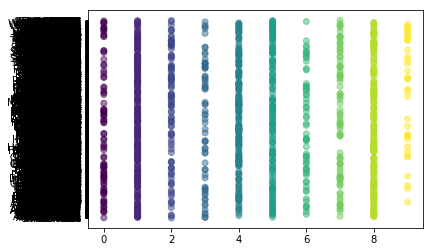

In [6]:
#Inspect your clustering

# Import pyplot
import matplotlib.pyplot as plt


# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(df['labels'], df['companies'], c = labels, alpha = 0.5)
plt.show();